In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
from datetime import datetime 

In [2]:
pip install jdatetime


Note: you may need to restart the kernel to use updated packages.


## آماده سازی دیتاست جهت ورود به پکیج های برنامه

In [3]:
import jdatetime
data = pd.read_excel('Case Study v2.xlsx' , header = 1)
print (data.head())
print ('\n Data Types:')
print (data.dtypes)


   Year  Month  Total Sales (lt.)   Avg. Price  Total Visitors  Year.Month
0  1391      1           10531680  1338.424656          109167     1391.01
1  1391      2           11092325  1314.441618          122675     1391.02
2  1391      3           11529846  1267.542544          197621     1391.03
3  1391      4           12470776  1241.471640          621211     1391.04
4  1391      5            9386417  1183.481067         1025287     1391.05

 Data Types:
Year                   int64
Month                  int64
Total Sales (lt.)      int64
Avg. Price           float64
Total Visitors         int64
Year.Month           float64
dtype: object


In [4]:
data.rename(columns = {"Year.Month":"YearMonth"} , inplace=True)

In [5]:
data.rename(columns = {"Total Sales (lt.)":"total-sales" , "Avg. Price":"price", "Total Visitors":"visitor-count"}, inplace=True)


In [6]:
data.head()

,Year,Month,total-sales,price,visitor-count,YearMonth
0,1391,1,10531680,1338.424656,109167,1391.01
1,1391,2,11092325,1314.441618,122675,1391.02
2,1391,3,11529846,1267.542544,197621,1391.03
3,1391,4,12470776,1241.471640,621211,1391.04
4,1391,5,9386417,1183.481067,1025287,1391.05


In [7]:
data = data.append(["YEARMONTHTIME"])
data.rename(columns = {0:"YEARMONTHTIME"} , inplace=True)
data["YEARMONTHTIME"].replace(np.nan,    jdatetime.date(1391 ,1 , 1)     , inplace=True)


In [8]:
data.dropna(inplace=True)

In [9]:
data.head()

,YEARMONTHTIME,Month,Year,YearMonth,price,total-sales,visitor-count
0,1391-01-01,1.0,1391.0,1391.01,1338.424656,10531680.0,109167.0
1,1391-01-01,2.0,1391.0,1391.02,1314.441618,11092325.0,122675.0
2,1391-01-01,3.0,1391.0,1391.03,1267.542544,11529846.0,197621.0
3,1391-01-01,4.0,1391.0,1391.04,1241.471640,12470776.0,621211.0
4,1391-01-01,5.0,1391.0,1391.05,1183.481067,9386417.0,1025287.0


In [10]:

for i in range (0 , 84):
    warnings.filterwarnings('ignore')
    data["YEARMONTHTIME"][i] = (jdatetime.date(int(data["Year"][i]), int(data["Month"][i]), 1).togregorian().strftime("%Y""-""%m"))

In [11]:
data.head()

,YEARMONTHTIME,Month,Year,YearMonth,price,total-sales,visitor-count
0,2012-03,1.0,1391.0,1391.01,1338.424656,10531680.0,109167.0
1,2012-04,2.0,1391.0,1391.02,1314.441618,11092325.0,122675.0
2,2012-05,3.0,1391.0,1391.03,1267.542544,11529846.0,197621.0
3,2012-06,4.0,1391.0,1391.04,1241.471640,12470776.0,621211.0
4,2012-07,5.0,1391.0,1391.05,1183.481067,9386417.0,1025287.0


In [12]:
data.to_csv("Case Study.csv")

In [13]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Case Study.csv', parse_dates=['YEARMONTHTIME'], index_col='YEARMONTHTIME',date_parser=dateparse)
print(data.head())

               Unnamed: 0  Month    Year  YearMonth        price  total-sales  \
YEARMONTHTIME                                                                   
2012-03-01              0    1.0  1391.0    1391.01  1338.424656   10531680.0   
2012-04-01              1    2.0  1391.0    1391.02  1314.441618   11092325.0   
2012-05-01              2    3.0  1391.0    1391.03  1267.542544   11529846.0   
2012-06-01              3    4.0  1391.0    1391.04  1241.471640   12470776.0   
2012-07-01              4    5.0  1391.0    1391.05  1183.481067    9386417.0   

               visitor-count  
YEARMONTHTIME                 
2012-03-01          109167.0  
2012-04-01          122675.0  
2012-05-01          197621.0  
2012-06-01          621211.0  
2012-07-01         1025287.0  


## انتخاب سری زمانی مورد نظر 

In [14]:
ts = data['total-sales'] 
ts.head(10)
data.index

DatetimeIndex(['2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
      

In [15]:
ts.head()

YEARMONTHTIME
2012-03-01    10531680.0
2012-04-01    11092325.0
2012-05-01    11529846.0
2012-06-01    12470776.0
2012-07-01     9386417.0
Name: total-sales, dtype: float64

In [16]:
ts['2012-03-01']

10531680.0

In [17]:
ts['2012']

YEARMONTHTIME
2012-03-01    10531680.0
2012-04-01    11092325.0
2012-05-01    11529846.0
2012-06-01    12470776.0
2012-07-01     9386417.0
2012-08-01    23008463.0
2012-09-01    22429432.0
2012-10-01    21829290.0
2012-11-01    20312652.0
2012-12-01    17036564.0
Name: total-sales, dtype: float64

In [18]:
#from datetime import datetime 
ts[datetime(2012,3,1)]

10531680.0

## ترسیم نمودار اولیه از داده انتخابی ( آنالیز دیداری)

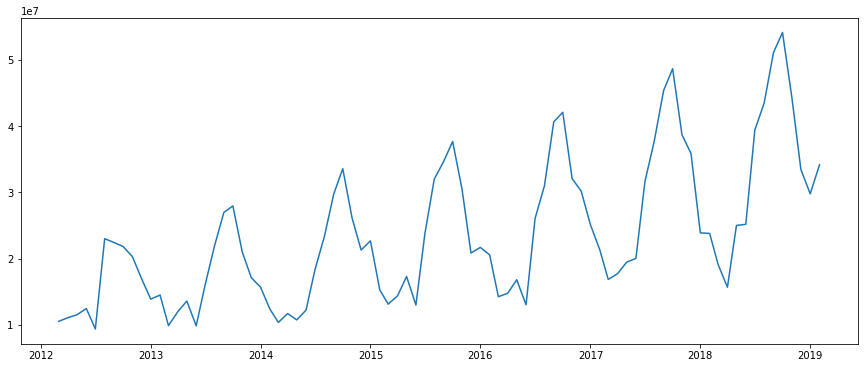

In [19]:
#warnings.filterwarnings('ignore')
plt.figure(figsize=(15,6))
plt.plot(ts)

## Rolling Statistics Plotting Function
#### در این قسمت تابعی تعریف شده برای بارها بررسی دیداری 
#### _Stationarity_
#### با استفاده از 
#### _Rolling Mean | Rolling Standard Deviation (STD)_
#### لطفا توجه داشته باشید برای حفظ شباهت واحد به میانگین ،از واریانس استفاده نشده است  

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

##  نمودار داده همراه با نمایش میانگین و انحراف معیار
## رنگ آبی : داده 
## رنگ قرمز : میانگین
## رنگ مشکی : انحراف معیار
## ودر ادامه نتایج ارزیابی در قالب مقادیر تست مانند 
### P-value , ...
## آمده است .

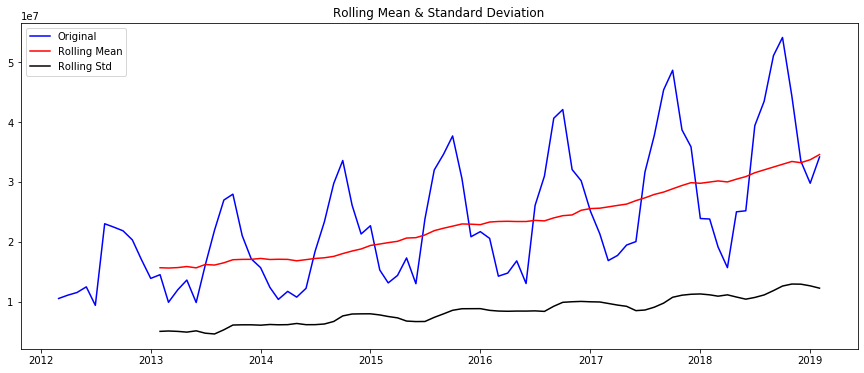

Results of Dickey-Fuller Test:
Test Statistic                  2.599622
p-value                         0.999075
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [21]:
plt.figure(figsize = (15,6))
test_stationarity(ts)

## برآورد و حذف روند
#### ما می توانیم تغییراتی را ایجاد کنیم که مقادیر بیشتر را نسبت به مقادیر کوچک تر ارزیابی کنند
#### به همین منظور می توان از لگاریتم و یا ریشه های دوم و سوم و یا چهارم این مقادیر استفاده کرد .
#### در اینجا از لگاریتم استفاده می کنیم.

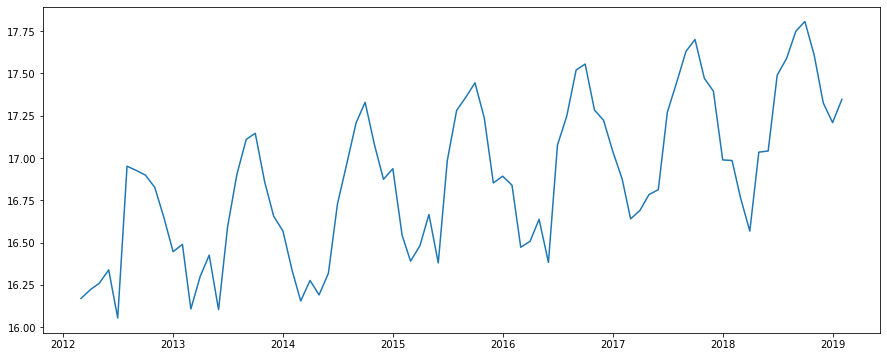

In [22]:
ts_log = np.log(ts)
plt.figure(figsize=(15,6))
plt.plot(ts_log)

### در این مورد ، ساده تر می توان یک روند رو به جلو را در داده ها مشاهده کرد. اما در شلوغی دیداری هنوز زیاد است.
### بنابراین ما می توانیم از برخی تکنیک ها برای تخمین یا مدل سازی این روند استفاده کنیم و سپس از سری حذف کنیم
### شایع ترین راه ها برای انجام این کار ، سه مورد زیر است 
### _1. Aggregation_ مناسب برای میانگین گیری برای فواصل زمانی نرتب مانند ماهیانه و یا هفتگی
### _2. Smoothing_ مناسب برای رولینگ
### _3. Polynomial Fitting_ مناسب برای رگرسیون
### ما در این بخش از تکنیک دوم استفاده خواهیم کرد
 

## Moving Average  ( Smotthing Way No1 )

## ترسیم : میانگین متحرک

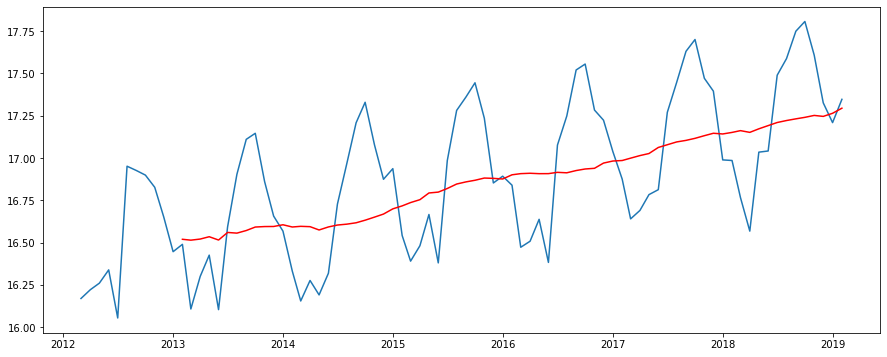

In [23]:
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(15,6))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

## بررسی تفاوت حاصل از لگاریتم گرفتن 

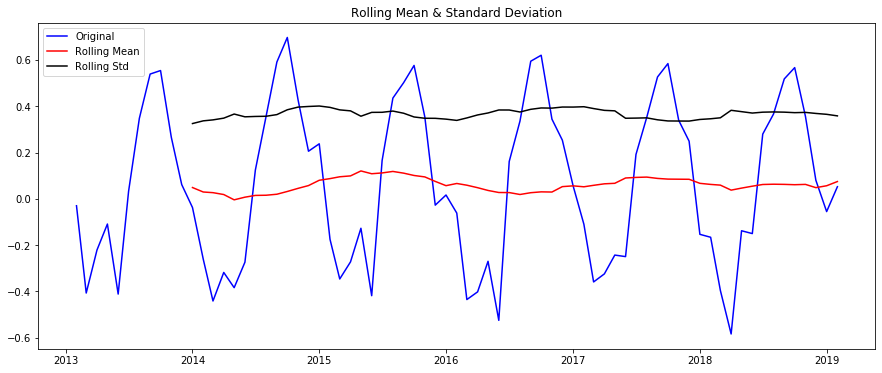

Results of Dickey-Fuller Test:
Test Statistic                 -1.903360
p-value                         0.330482
#Lags Used                     12.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [24]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
plt.figure(figsize=(15,6))
test_stationarity(ts_log_moving_avg_diff)

## Exponentially Weighted Moving Average
## میانگین متحرک وزنی نمایی

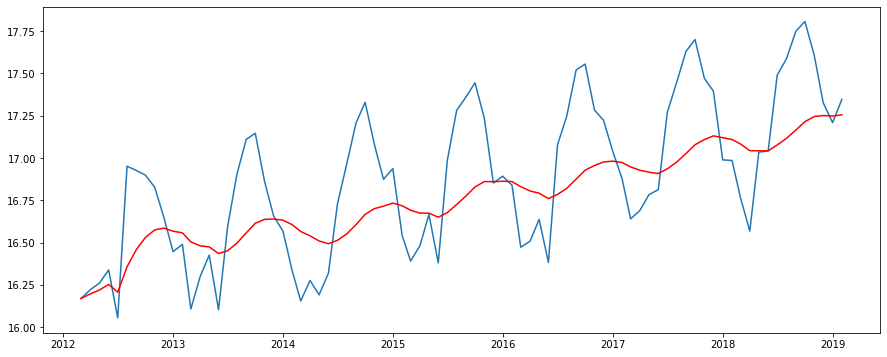

In [25]:
expwighted_avg = ts_log.ewm(12).mean()
plt.figure(figsize=(15,6))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

## بررسی تفاوت حاصل از لگاریتم گرفتن

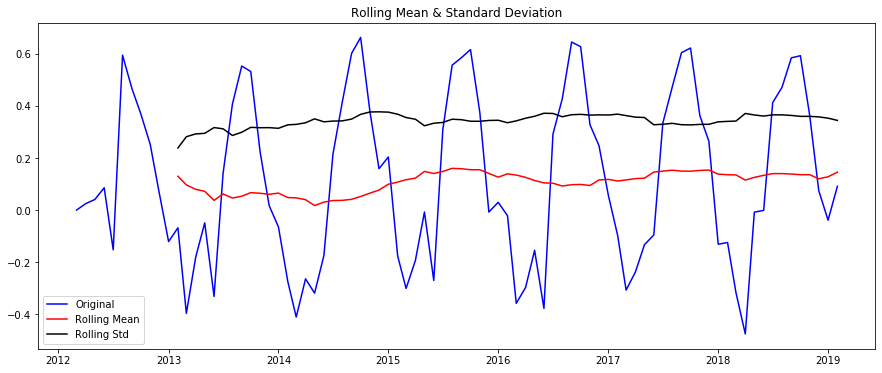

Results of Dickey-Fuller Test:
Test Statistic                 -1.135249
p-value                         0.700812
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [26]:
ts_log_ewma_diff = ts_log - expwighted_avg
plt.figure(figsize=(15,6))
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality
### _Differencing_

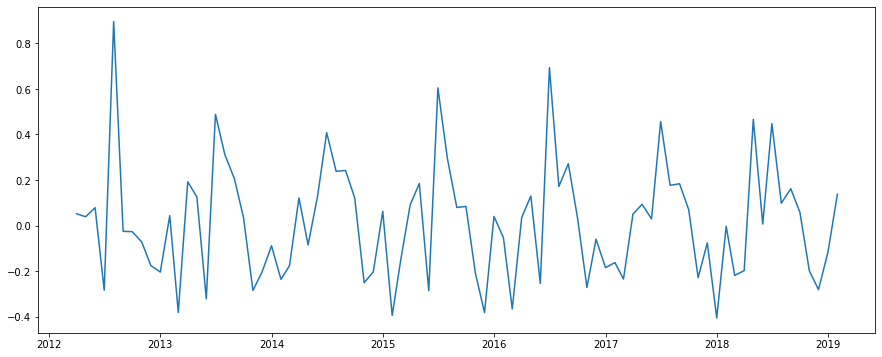

In [27]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(15,6))
plt.plot(ts_log_diff)

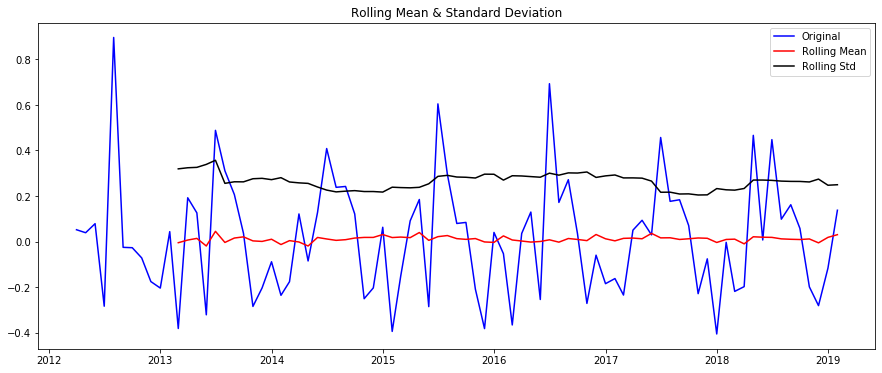

Results of Dickey-Fuller Test:
Test Statistic                -1.038965e+01
p-value                        2.036694e-18
#Lags Used                     1.000000e+01
Number of Observations Used    7.200000e+01
Critical Value (1%)           -3.524624e+00
Critical Value (5%)           -2.902607e+00
Critical Value (10%)          -2.588679e+00
dtype: float64


In [28]:
ts_log_diff.dropna(inplace=True)
plt.figure(figsize=(15,6))
test_stationarity(ts_log_diff)

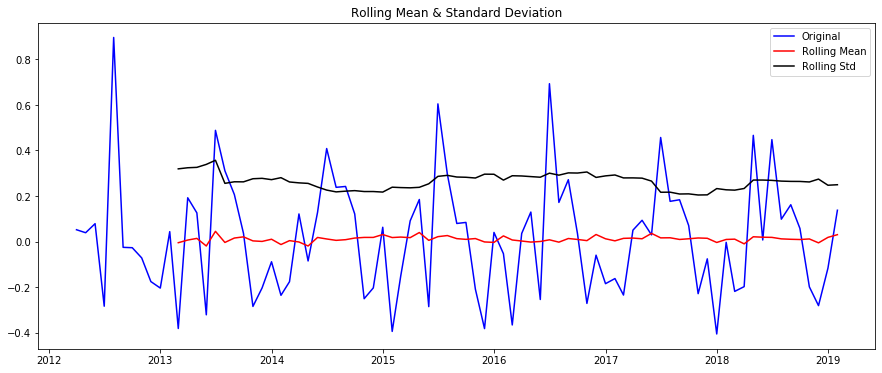

Results of Dickey-Fuller Test:
Test Statistic                -1.038965e+01
p-value                        2.036694e-18
#Lags Used                     1.000000e+01
Number of Observations Used    7.200000e+01
Critical Value (1%)           -3.524624e+00
Critical Value (5%)           -2.902607e+00
Critical Value (10%)          -2.588679e+00
dtype: float64


In [29]:
ts_log_diff.dropna(inplace=True)
plt.figure(figsize=(15,6))
test_stationarity(ts_log_diff)

### _Decomposing_

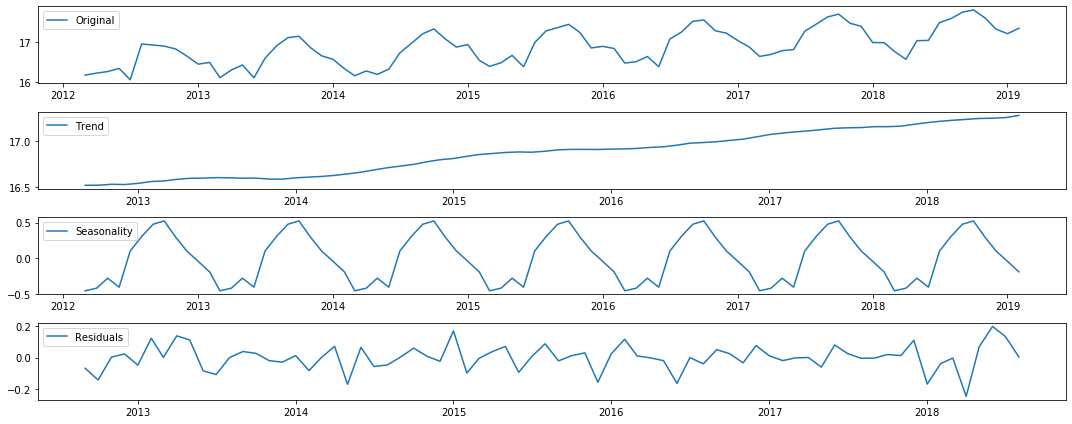

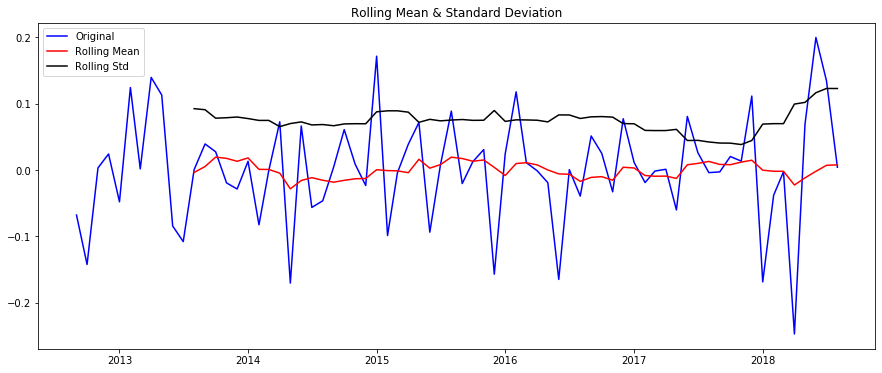

Results of Dickey-Fuller Test:
Test Statistic                 -5.645213
p-value                         0.000001
#Lags Used                      4.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,6))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
##########################
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.figure(figsize=(15,6))
test_stationarity(ts_log_decompose)

## _The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary._

## در نتیجه زمان پیش بینی فرا رسیده است 

## آنچه که در رابطه با مدل پیش بینی قابل شرح است :
## _Auto-Regressive Integrated Moving Averages = ARIMA Model_
### _1. Number of AR (Auto-Regressive) terms (p)_
### _2. Number of MA (Moving Average) terms (q)_
### _3. Number of Differences (d)_
## بنابراین ، نیاز به تعیین مقادیر ذکر شده داریم که با استفاده از دو نمودار در ادامه ، این مهم صورت می پذیرد.


In [31]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

## ACF  نمودار
## PACF  و نمودار

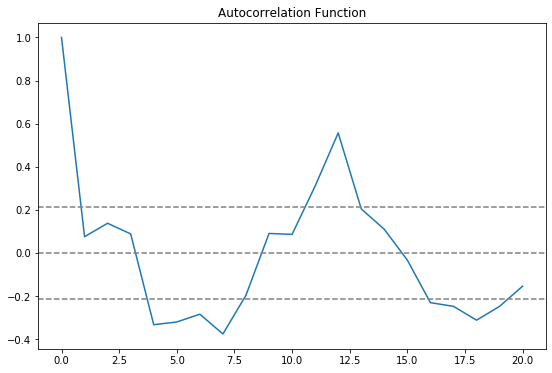

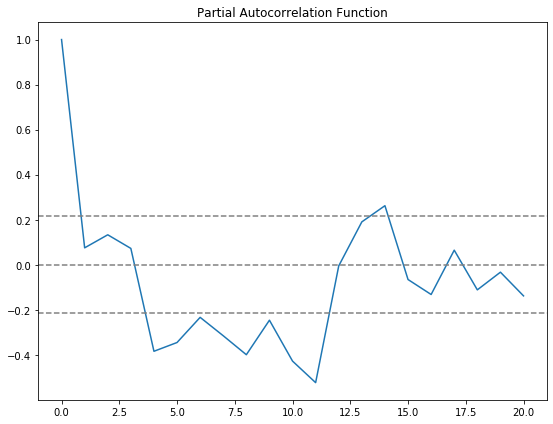

In [32]:
#Plot ACF: 
plt.figure(figsize=(20,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.figure(figsize=(15,6))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## همانطور که در دو نمودار می بینیم ، اولین محل تلاقی نمودار با اولین خط افقی از سطح بالا مقدار 
## را نشان می دهد P
## که برابر است با 2
## و همینطور است در رابطه با مقدار 
## q 
## بنابراین در ادامه به ترسیم نمودارهای 
## AR ' MA 
## و ترکیبی از هر دو خواهیم پرداخت.

## AR  بررسی 

Text(0.5, 1.0, 'RSS: 5.3463')

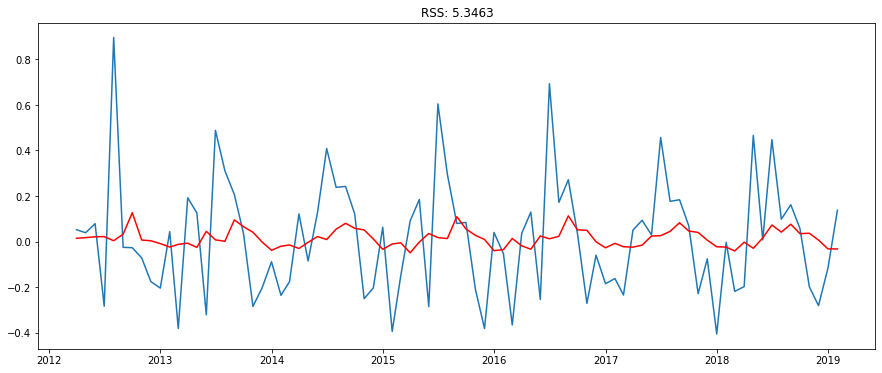

In [33]:
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(15,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## MA بررسی

Text(0.5, 1.0, 'RSS: 5.2213')

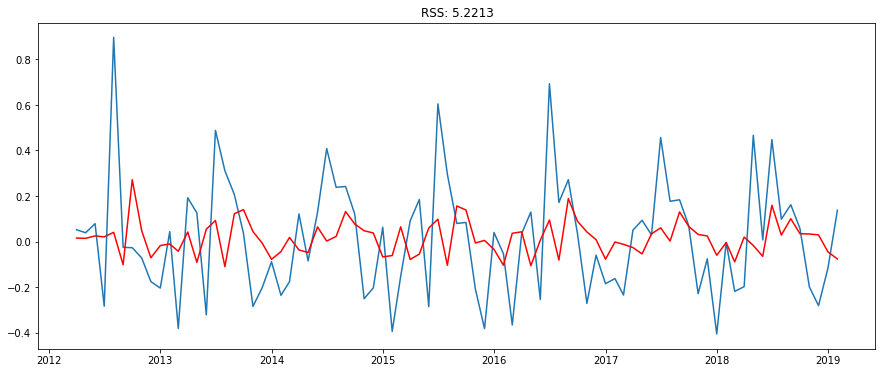

In [34]:
warnings.filterwarnings('ignore')
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(15,6))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

## ترکیبی

Text(0.5, 1.0, 'RSS: 4.0491')

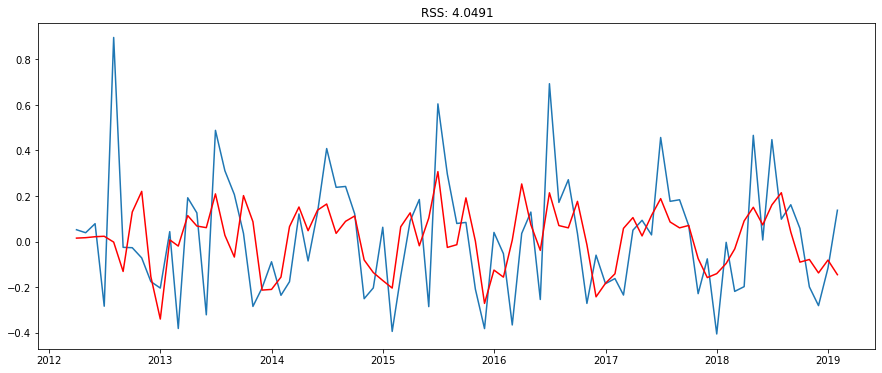

In [35]:
for p in range(6):
    for d in range(2):
        for q in range(4):
            try:
                warnings.filterwarnings('ignore')
                model = ARIMA(ts_log, order=(p, d, q))  
                results_ARIMA = model.fit(disp=-1)  
            except:
                pass
plt.figure(figsize=(15,6))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

YEARMONTHTIME
2012-04-01    0.015008
2012-05-01    0.016947
2012-06-01    0.021124
2012-07-01    0.023151
2012-08-01   -0.002510
dtype: float64


In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

YEARMONTHTIME
2012-04-01    0.015008
2012-05-01    0.031955
2012-06-01    0.053079
2012-07-01    0.076230
2012-08-01    0.073720
dtype: float64


In [38]:
warnings.filterwarnings('ignore')
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

YEARMONTHTIME
2012-03-01    16.169898
2012-04-01    16.184906
2012-05-01    16.201853
2012-06-01    16.222977
2012-07-01    16.246129
dtype: float64

## ترسیم نمودار نهایی مدل پیش بینی و مدل داده اصلی 

Text(0.5, 1.0, 'RMSE: 6331533.5293')

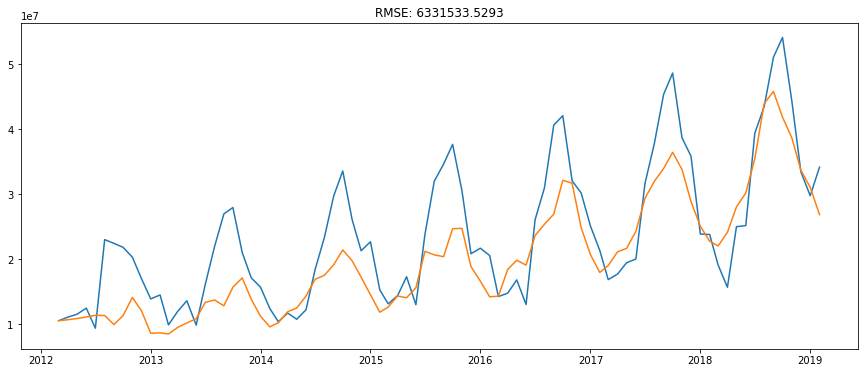

In [39]:
warnings.filterwarnings('ignore')
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(15,6))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [40]:
warnings.filterwarnings('ignore')
results_ARIMA.predict(start=datetime(2019,3,1), end=datetime(2020,2,1), exog=None, dynamic=False)

2019-03-01   -0.019073
2019-04-01    0.204962
2019-05-01    0.174925
2019-06-01    0.051999
2019-07-01    0.037863
2019-08-01   -0.000295
2019-09-01   -0.101358
2019-10-01   -0.052237
2019-11-01   -0.029436
2019-12-01   -0.018877
2020-01-01    0.040889
2020-02-01    0.067403
Freq: MS, dtype: float64